先看一下數據集

In [3]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people()
print(dir(lfw_people))


['DESCR', 'data', 'images', 'target', 'target_names']


透過輸出，我們看到lfw_people共有['DESCR', 'data', 'images', 'target', 'target_names']五個屬性。  
DESCR表示對資料集的描述：

In [4]:
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

該資料集的特徵，共有5749類，即5749人，樣本總數為13233，每張照片維度為5828，特徵值範圍為0-255.  
**Data Set Characteristics:**

    =================   =======================
    Classes                                5749
    Samples total                         13233
    Dimensionality                         5828
    Features            real, between 0 and 255
    =================   =======================


用法:
Usage
~~~~~

``scikit-learn`` provides two loaders that will automatically download,
cache, parse the metadata files, decode the jpeg and convert the
interesting slices into memmapped numpy arrays. This dataset size is more
than 200 MB. The first load typically takes more than a couple of minutes
to fully decode the relevant part of the JPEG files into numpy arrays. If
the dataset has  been loaded once, the following times the loading times
less than 200ms by using a memmapped version memoized on the disk in the
``~/scikit_learn_data/lfw_home/`` folder using ``joblib``.


DESCR中這段描述告訴了我該資料集有兩種使用模式，第一種用與人臉辨識任務，多分類任務（因此進行監督學習）。匯入時需在資料集中標示參數min_faces_per_person = 70，選取資料集中單人照片超過70張的照片。如果單人只有1張人臉，那對我們分類是沒有任何用處的，只有訓練集（量也過少），無法進行測試，所有對資料集中資料進行一個過濾，選取出自己需要的資料。

載入方式：  
lfw_people = fetch_lfw_people(min_faces_per_person=70)

第二個模式通常用於臉部驗證任務：每個樣本是一對照片，判斷屬於或不屬於一個人。



載入方式：  
from sklearn.datasets import fetch_lfw_pairs  
lfw_pairs_train = fetch_lfw_pairs(subset= 'train' )

下面就是具體的屬性了，先透過shape來獲得該屬性的維度資訊。

In [2]:
#我們這邊用RESIZE將資料尺吋縮小為40%
ds = fetch_lfw_people(min_faces_per_person = 70,resize = 0.4)

In [5]:
print(dir(ds))
print(ds.data.shape)      
print(ds.images.shape)       
print(ds.target.shape)      
print(ds.target_names.shape) 

['DESCR', 'data', 'images', 'target', 'target_names']
(1288, 1850)
(1288, 50, 37)
(1288,)
(7,)


data屬性直接存放所有影像的像素值，並將圖片的像素值資訊從二維轉換為一維。

images屬性存放每張圖片的像素值，1288代表有1288個樣本。我們可以透過pyplotlib.pyplot中的imshow（）函數來展示圖像。

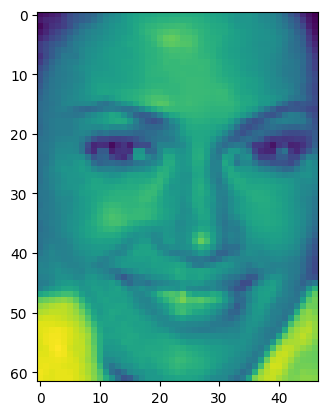

In [8]:
import matplotlib.pyplot as plt
plt.imshow(lfw_people.images[100])
plt.show()

target存放圖像資訊結果，即屬於哪個人，我們透過切片查看其前二十個數據

In [11]:
print(ds.target[:20])

[5 6 3 1 0 1 3 4 3 0 3 2 3 1 4 3 3 3 3 3]


target_names，我們將其輸出看結果



In [18]:
print(ds.target_names)
# ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
# 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


也就是擁有70張照片的人的名字。

